# Session 2: 15/11/22

# 1. Increase in tree populations in Norfolk # 

In the paper ‘Postglacial population of forest trees in Norfolk, UK’ by K.D. Bennet (Nature, 1983), the pollen sediments in an infilled lake were dated and quantified. This was used to obtain a measure of the accumulation rate of pollen grains at different points of time. By assuming that the pollen grain production rates reflect the population of trees at the moment the pollen is produced, this dataset allows us to quantify the population of trees a long time ago (~9000 years ago), which increases rapidly with the rising temperatures of that time.

## 1.1 Pinus sylvestris

We will first analyse the data for pines. The dataset gives us an estimate of the amount of trees of a particular species (pines, in this case) present at different timepoints. To import the data and plot it, execute the cell below.

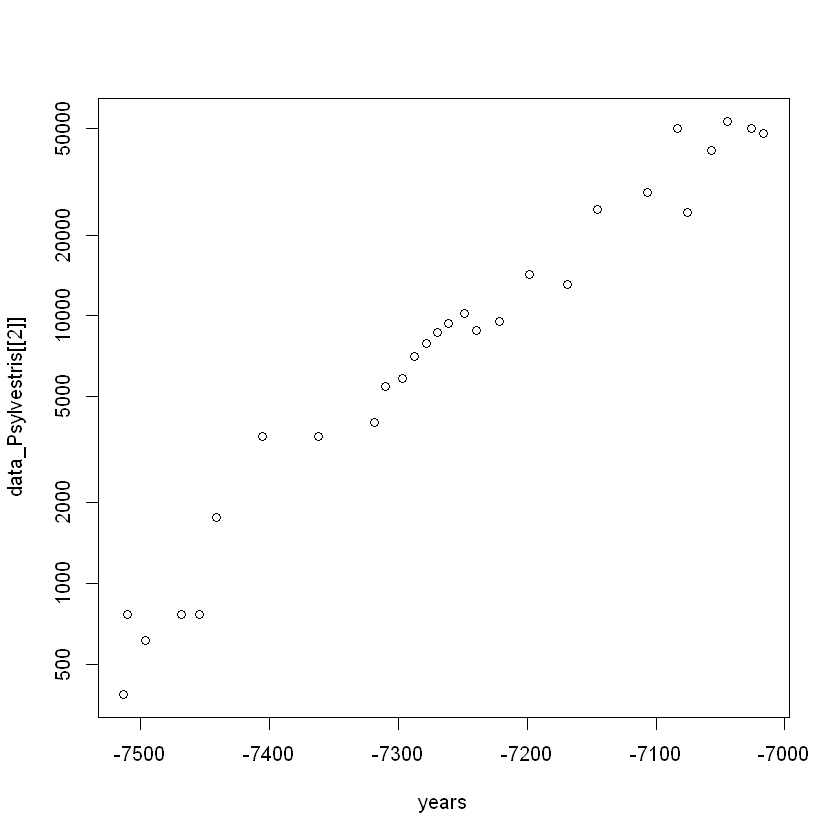

In [17]:
data_Psylvestris <-read.csv("Bennet_1983_Psylvestris.csv") #Imports the data from the paper from the csv file.
years<-1983-data_Psylvestris[[1]] #The data is in "years ago" - this line changes it to years BC.
plot(years, data_Psylvestris[[2]], log="y") #Plots the data in logarithmic scale.#

**Could this dataset be approximately modelled with a Malthusian growth model? Why?**	

Answer: sdfgasd


Now, we can try to model this growth of pine trees by solving the ODE for Malthusian growth.
We will first need to install the package to solve ODEs with R (below).

In [18]:
install.packages("deSolve") #If the package needs to be installed. If it's already installed you will get a warning - ignore it.
library("deSolve") #This is the library we will use to solve the equations

Warning message:
"package 'deSolve' is in use and will not be installed"


Then, we can write down the equations, which is given by the function "growth_func" (a\*y is the actual function where a is a parameter and y is the number of trees at any moment of time) and we will use the in-built function "ode" from the package to solve the equation with initial contition y0 and between the times specified in the "times" vector.

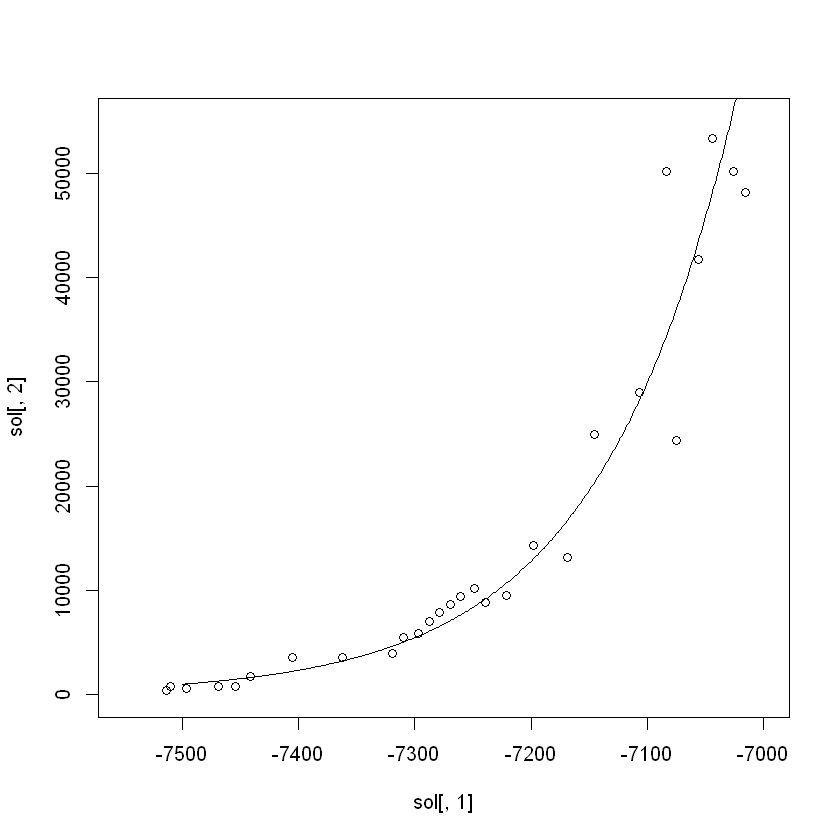

In [19]:
times=seq(-7500,-7020,1) #Creates a vector of timepoints (years) at which the solution will be evaluated
y0=1000 #Initial condition
growth_func<-function(t,y,a){list(a*y)} #Malthusian growth function.
sol=ode(y0,times,growth_func,0.0085) #Calls the R function ‘ode’ to solve the ODE model with parameter a=0.005
plot(sol[,1],sol[,2], type="l", xlim=c(-7550,-7000), ylim=c(0,55000)) #Plots the solution with a line
points(years, data_Psylvestris[[2]]) # Adds the dataset to the plot

**Change the values of the parameters to adjust the solution of the model to the dataset.** Note you have two parameters: the initial condition y0 and the growth rate a. Once you have a set of parameter values that represent the data well, you can obtain some information about the trees. **Which parameter offers you the most information? What is this information?**

Answer:

## 1.2 Corylus avellana

Now lets try the same thing with the common hazel. Again, to import the data and plot it, execute the cell below.

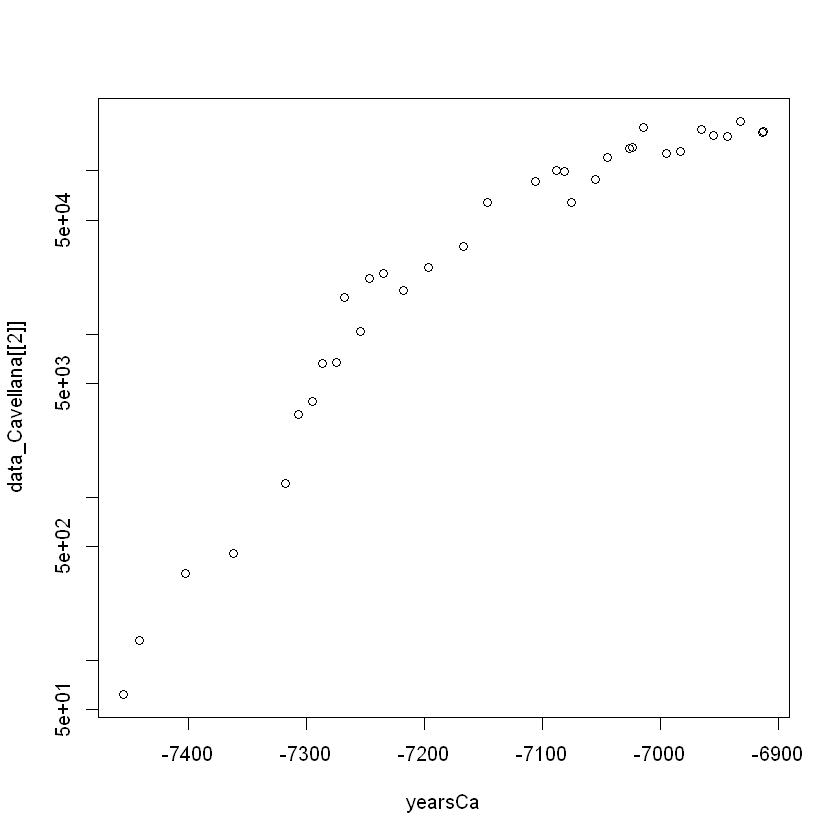

In [20]:
data_Cavellana <-read.csv("Bennet_1983_Cavellana.csv") #Imports the data from the paper from the csv file.
yearsCa<-1983-data_Cavellana[[1]] #The data is in "years ago" - this line changes it to years BC.
plot(yearsCa, data_Cavellana[[2]], log="y") #Plots the data in logarithmic scale.#

**Could this dataset be approximately modelled with a Malthusian growth model? Why?**	

Answer:

Now, in this case, we can try modelling it with a logistic growth that takes into account the limitations in resources.
We can reuse the code we have for pine trees but we need to adjust the growth function from a\*y to a[1]\*y\*(a[2]-y), where a[1] and a[2] are two different parameters.

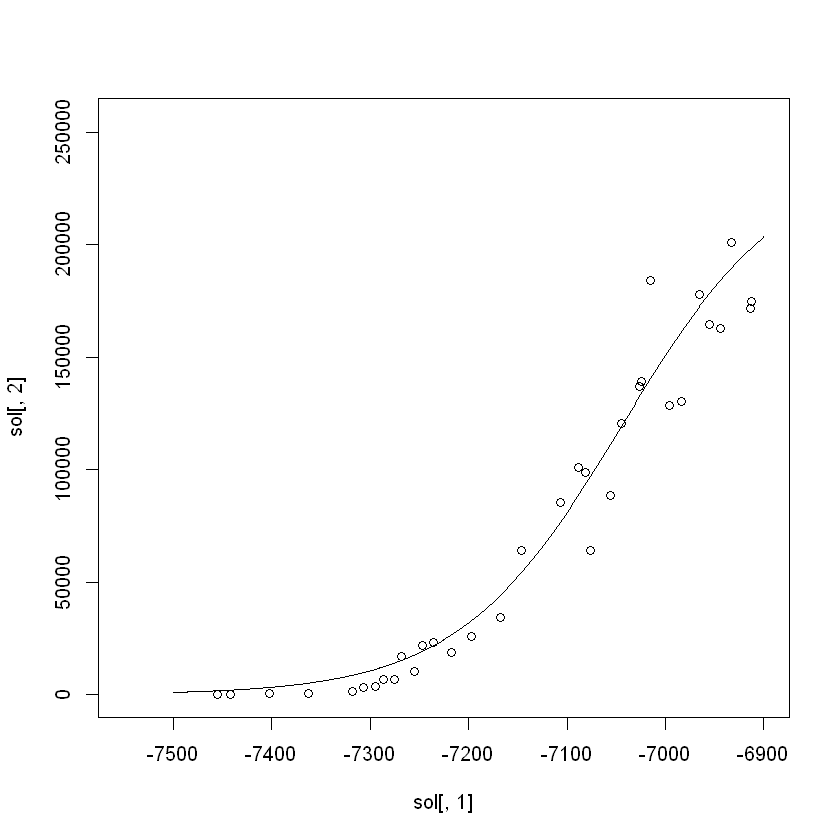

In [21]:
timesCa=seq(-7500,-6900,1) #Creates a vector of timepoints (years) at which the solution will be evaluated
y0=1000 #Initial condition
growth_func<-function(t,y,a){list(a[1]*y*(a[2]-y))} #Malthusian growth function.
a<-c(5*10^-8,240000)
sol=ode(y0,timesCa,growth_func,a) #Calls the R function ‘ode’ to solve the ODE model with parameter a=0.005
plot(sol[,1],sol[,2], type="l", xlim=c(-7550,-6900), ylim=c(0,255000)) #Plots the solution with a line
points(yearsCa, data_Cavellana[[2]]) # Adds the dataset to the plot

**Change the values of the parameters to adjust the solution of the model to the dataset.** Once you have successfully captured the data with the model, **can you estimate which is the maximum density of hazels this area can sustain?**

Answer:

**Given this mathematical modelling, what can we infer from the behaviour of these tree species? Which one seems to reproduce faster? Towards the end of this dataset (~7000 years BC), is any of them depleting significantly the available resources?**

Answer:

# 2. Michaelis-Menten kinetics in histone modifications

In the previous session we explored how to model mathematically biochemical reactions, or at least how to write down the equations. We finished by obtaining the equations for the Michaelis-Menten reactions:
\begin{equation}
S+E \leftrightharpoons ES,
\end{equation}
\begin{equation}
ES \rightarrow E+P,
\end{equation}
where S is the substrate, E is the enzyme, ES the enzyme-substrate
the equations that model it are:
\begin{align}
\frac{d c_S}{d t}&= -k_\textrm{on} c_E c_S + k_\textrm{off} c_{ES} \\
\frac{d c_E}{d t}&= -k_\textrm{on} c_E c_S + k_\textrm{off} c_{ES} + k_\textrm{cat}c_{ES} \\
\frac{d c_{ES}}{d t}&= k_\textrm{on} c_E c_S - k_\textrm{off} c_{ES} - k_\textrm{cat} c_{ES} \\
\frac{d c_P}{d t}&=  k_\textrm{cat} c_{ES}
\end{align}

Now that have been written down, let's try solving them! The only major change to the code of exercise 1 is the function that we feed the ODE solver (here, the line that starts with MMfunc).

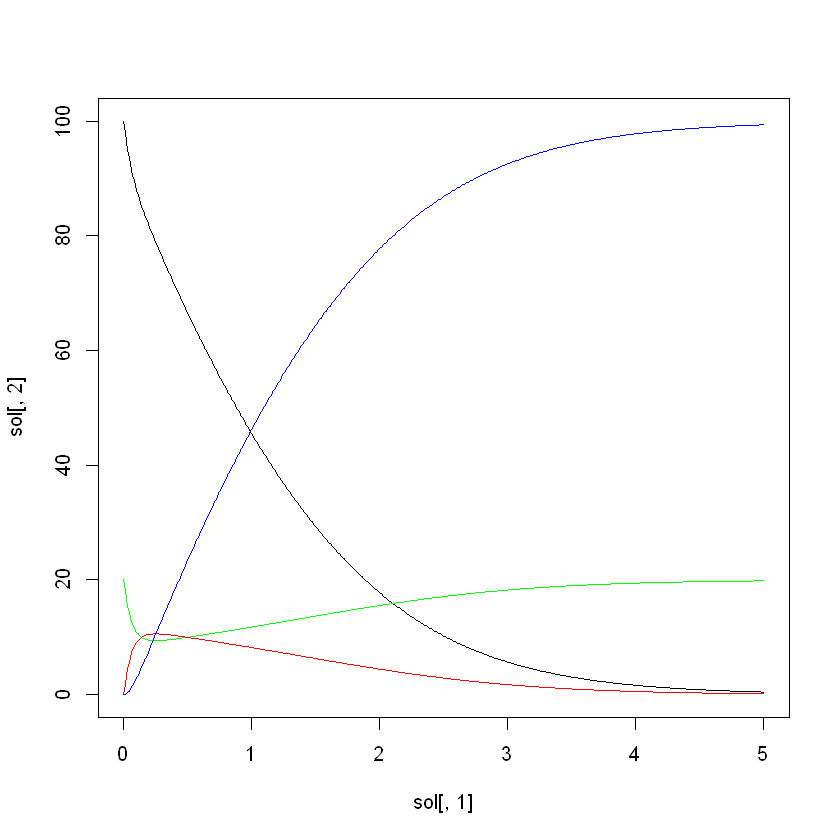

In [22]:
times=seq(0,5,0.01) #Creates a vector of timepoints (years) at which the solution will be evaluated
y0=c(100,20,0,0) #Initial condition. We assume at t=0 we have only substrate and some enzymes.
MMfunc<-function(t,y,a){list(c(-a[1]*y[1]*y[2]+a[2]*y[3],-a[1]*y[1]*y[2]+a[2]*y[3]+a[3]*y[3],a[1]*y[1]*y[2]-a[2]*y[3]-a[3]*y[3],a[3]*y[3]))}
#The function in the above line encodes for the 4 MM equations, where y[1:4] are the concentrations of the molecules and a[1:3] the parameters of the reactions
a<-c(0.1,2,5)
sol=ode(y0,times,MMfunc,a) #Calls the R function ‘ode’ to solve the ODE model with parameter a=0.005
plot(sol[,1],sol[,2], type="l", xlim=c(0,5), ylim=c(0,100)) #Plots dynamics of substrate conc.
lines(sol[,1],sol[,3],col="green")#enzyme conc.
lines(sol[,1],sol[,4],col="red")#enzyme-substrate conc.
lines(sol[,1],sol[,5],col="blue")#product conc.

But this is typically not the way the experiments are performed. Often, the eperiments measure the rate of creation of the product once the reaction has stabilised (this typically involves a continuous supply of the substrate to keep the reaction going). This "stabilisation" is normally referred to as the **equilibrium point** or **steady state** of the reaction.  

In the paper Valencia-Sanchez et al, Science (2021) they measured the product of the enzyme when there is a fixed concentration of substrate. In this paper they were analysing the enzyme dot1, whose substrate is nucleosomes and methylates a residue of the histones within the nucleosome (hence the product is a methylated nucleosome). A key point of the paper is to compare how this enzyme works in nucleosome with different post-translational modifications. The data is shown in the cell below for unmodified nucleosomes and for nucleosomes carrying an acetylation mark. The x axis is the substrate concentration (nucleosomes) and the y axis is the product creation rate (methylated nucleosomes). The points correspond to the rate of the reaction at steady state.

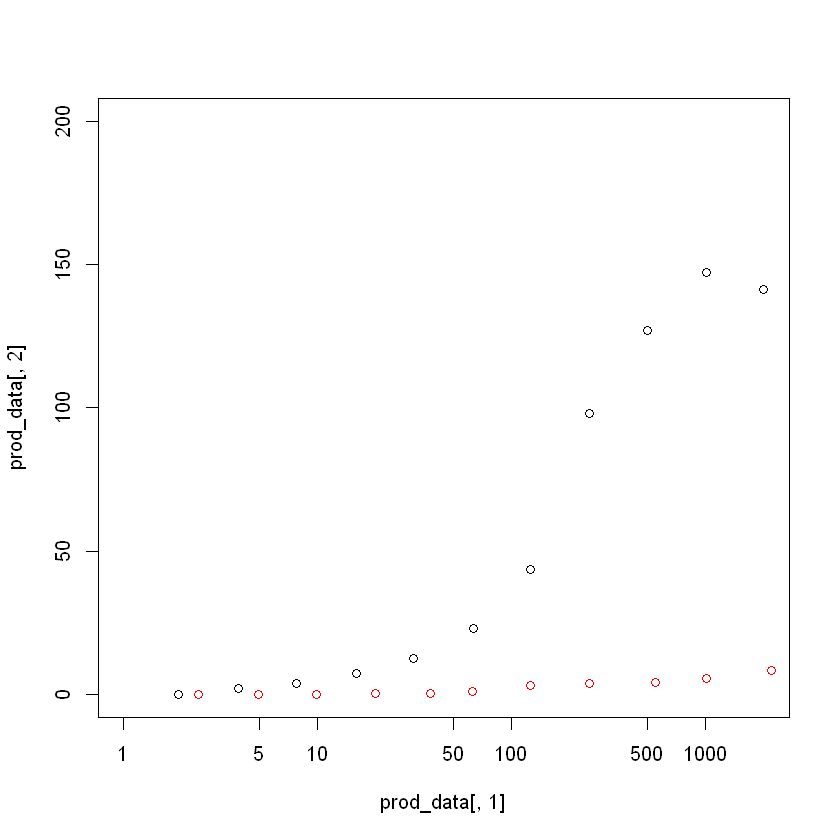

In [23]:
dot1dset<-read.csv("KJA_dataq.csv") #Imports the data from the paper from the csv file.
binding=dot1dset[1:6,1:4]
prod_data=dot1dset[,5:8]
plot(prod_data[,1],prod_data[,2],log="x", xlim=c(1,2000), ylim=c(0,200))#
points(prod_data[,3],prod_data[,4], col="red")

When the substrate is maintained at a given  concentration the equations become:
\begin{align}
\frac{d c_E}{d t}&= -k_\textrm{on} c_E c_S + k_\textrm{off} c_{ES} + k_\textrm{cat}c_{ES} \\
\frac{d c_{ES}}{d t}&= k_\textrm{on} c_E c_S - k_\textrm{off} c_{ES} - k_\textrm{cat} c_{ES}.
\end{align}
Note that $c_S$ is not a variable anymore but a parameter, since the concentration of the substrate has been fixed.

How can we use the model to compare with the data? One option is to solve the mathematical model for different $c_S$ (nucleosome concentration) and use the product creation rate $k_\textrm{cat} c_{ES}$ toeards the end of the simulation. By then, if we have allowed enough simulation time, the reaction should be at steady state. If we do this for various $c_S$ then we should be able to compare with the data of Valencia-Sanchez et al. A script that can be used for this purposes is provided in the cell below.

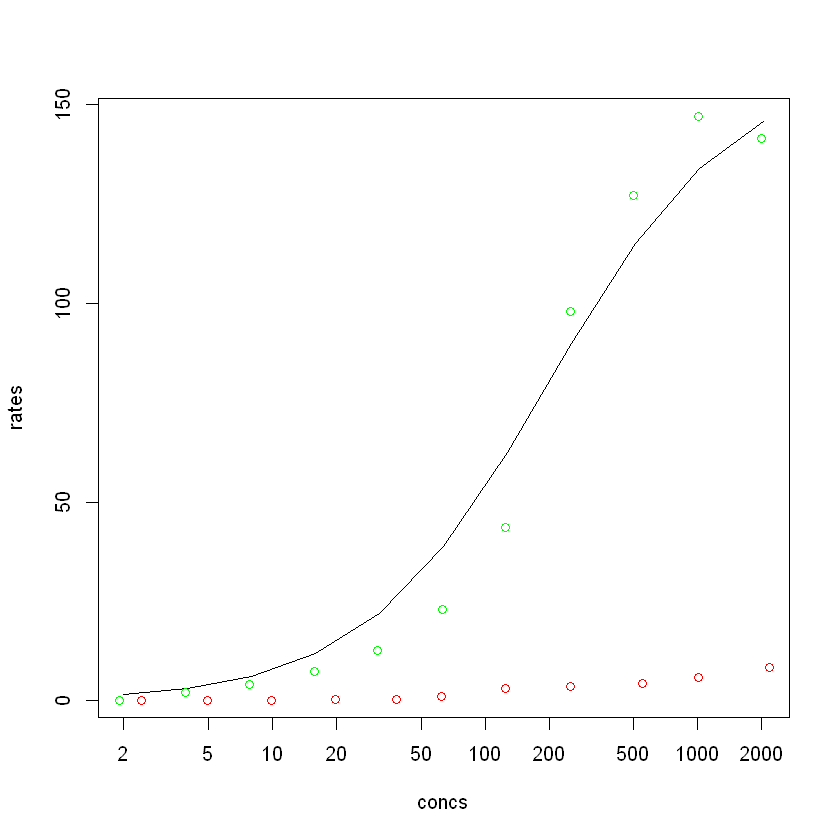

In [46]:
concs=c()
rates=c()
times=seq(0,100,1) #Creates a vector of timepoints (years) at which the solution will be evaluated
y0=c(20,0) #Initial condition. We assume at t=0 we have only substrate and some enzymes.
MMfunc<-function(t,y,a){list(c(-a[1]*a[4]*y[1]+a[2]*y[2]+a[3]*y[2],a[1]*a[4]*y[1]-a[2]*y[2]-a[3]*y[2]))}
#The function in the above line encodes for the 4 MM equations, where y[1:4] are the concentrations of the molecules and a[1:3] the parameters of the reactions
for (conc in 1:11)
    {
    a<-c(0.05,2,8,2^conc)
    sol=ode(y0,times,MMfunc,a) #Calls the R function ‘ode’ to solve the ODE model with parameter a=0.005
    concs <- append(concs, 2^conc)
    rates <- append(rates, a[3]*tail(sol,1)[3])
     }
plot(concs,rates, type="l", log="x") #Plots dynamics of substrate conc.
points(prod_data[,3],prod_data[,4], col="red")
points(prod_data[,1],prod_data[,2],col="green")#enzyme conc.

**What can we conclude from the data and the model? Which was the key parameter that changes between the acetylated and the unmodified nucleosomes as substrates? Binding or Catalysis?**

**Bonus question: Would you be able to do a similar analysis with pen and paper?** You can try setting the derivatives to zero and solve the equations. Then it becomes an algebraic equation which is easier, and, given that we have set the derivatives to zero, it implies we are at steady state (where nothing changes with time). Give an expression for $k_\textrm{cat} c_{ES}$ Taking into account that the total number of enzymes is fixed.